In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

# pour éviter les warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
bitcoin = pd.read_csv(r"BTC-EUR.csv")

In [3]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166.0
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103.0
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826.0
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625.0


<Axes: >

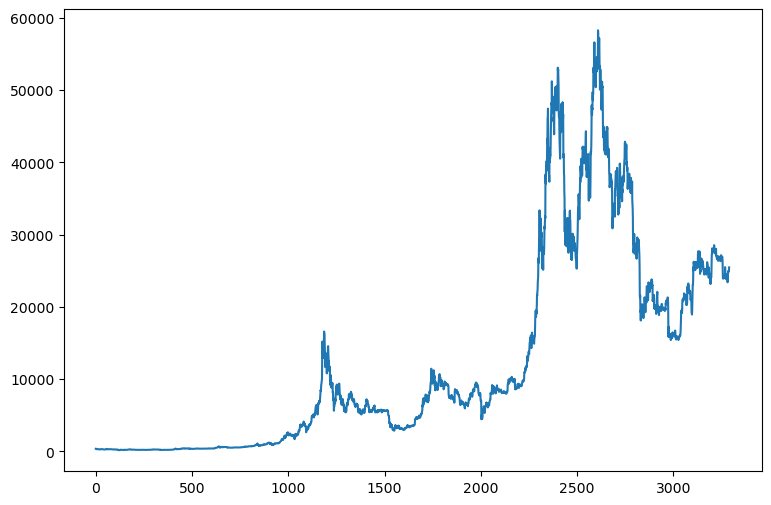

In [4]:
# Pour voir l'évolution de la variable 'Close'
bitcoin['Close'].plot(figsize=(9, 6))

In [5]:
# Pour avoir un index de type Datetime: (index_col = 'Date', parse_dates = True)

bitcoin = pd.read_csv(r"BTC-EUR.csv", index_col = 'Date', parse_dates = True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625.0


<Axes: xlabel='Date'>

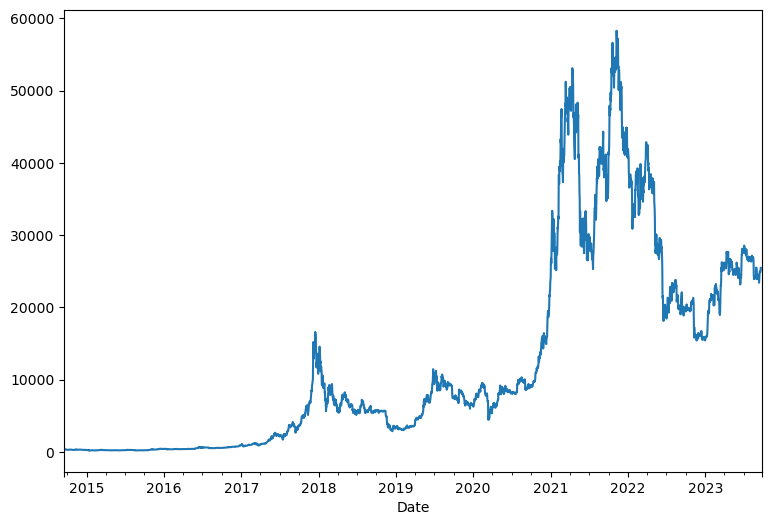

In [6]:
bitcoin['Close'].plot(figsize = (9, 6))

In [7]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-09-15', '2023-09-16', '2023-09-17', '2023-09-18',
               '2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
               '2023-09-23', '2023-09-24'],
              dtype='datetime64[ns]', name='Date', length=3295, freq=None)

<Axes: xlabel='Date'>

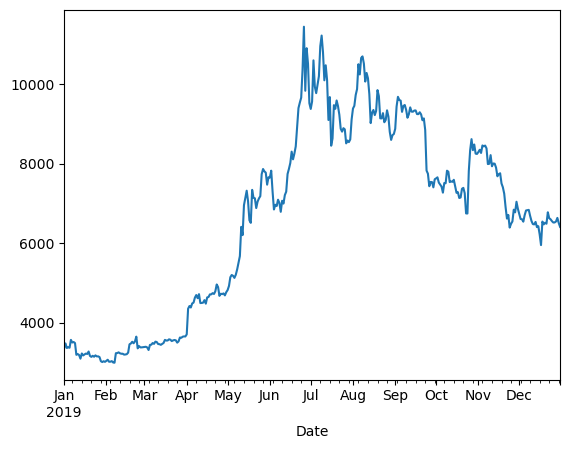

In [8]:
# Evolution du bitcoin en 2019
bitcoin['2019']['Close'].plot()

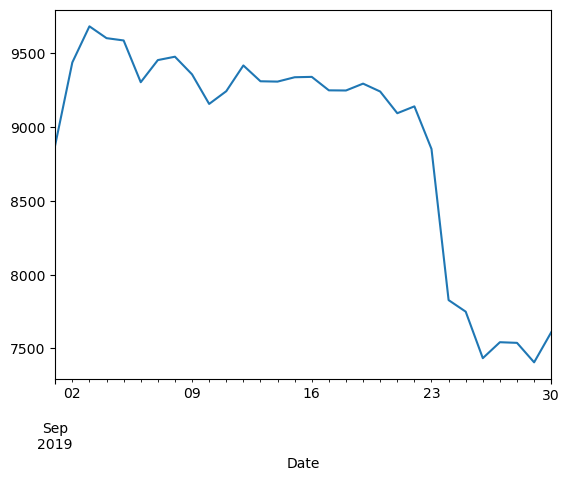

In [9]:
# Evolution du bitcoin en septembre 2019
bitcoin['2019-09']['Close'].plot();

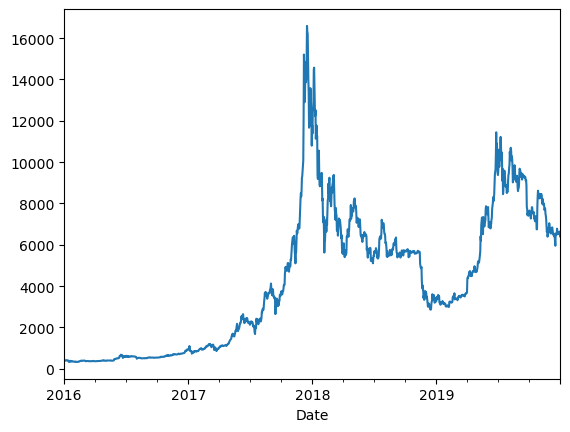

In [10]:
# Evolution du bitcoin entre 2016 et 2019
bitcoin['2016':'2019']['Close'].plot(); # ou bitcoin.loc['2016':'2019', 'Close'].plot();

# Fonction Resample

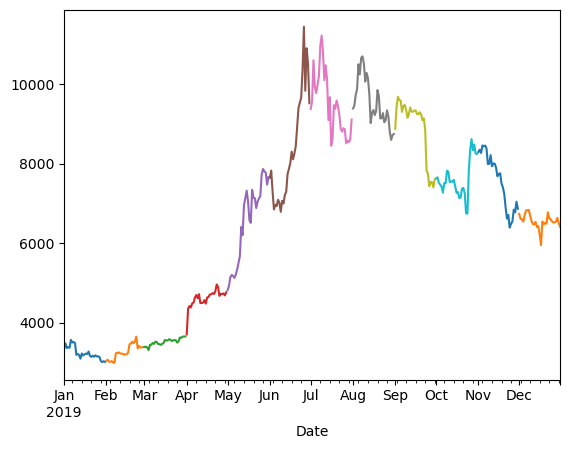

In [11]:
# Evolution sur chaque mois en 2019
bitcoin.loc['2019', 'Close'].resample('M').plot();

<Axes: xlabel='Date'>

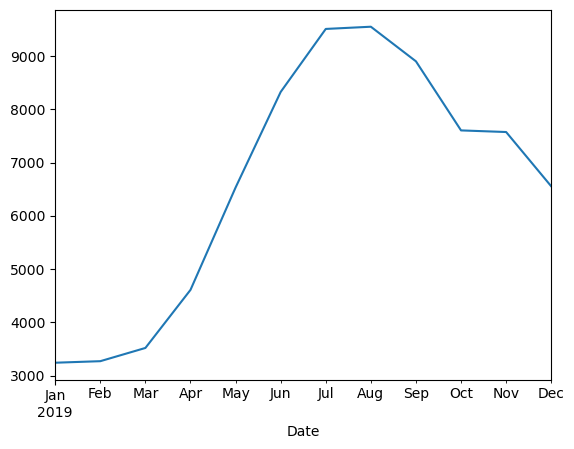

In [12]:
# Evolution de la moyenne sur chaque mois en 2019
bitcoin.loc['2019', 'Close'].resample('M').mean().plot()

<Axes: xlabel='Date'>

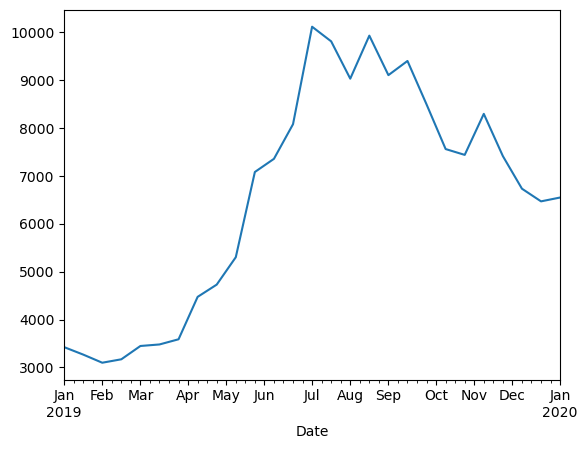

In [13]:
# Evolution de la moyenne toutes les deux semaines en 2019
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()

<Axes: xlabel='Date'>

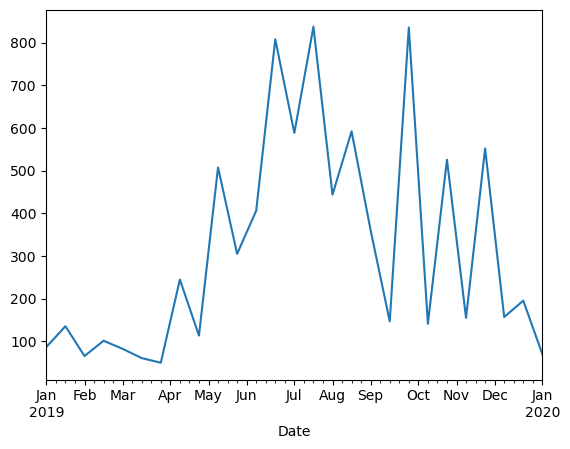

In [14]:
# Evolution de l'écart type (la volatilité) toutes les deux semaines en 2019
bitcoin.loc['2019', 'Close'].resample('2W').std().plot()

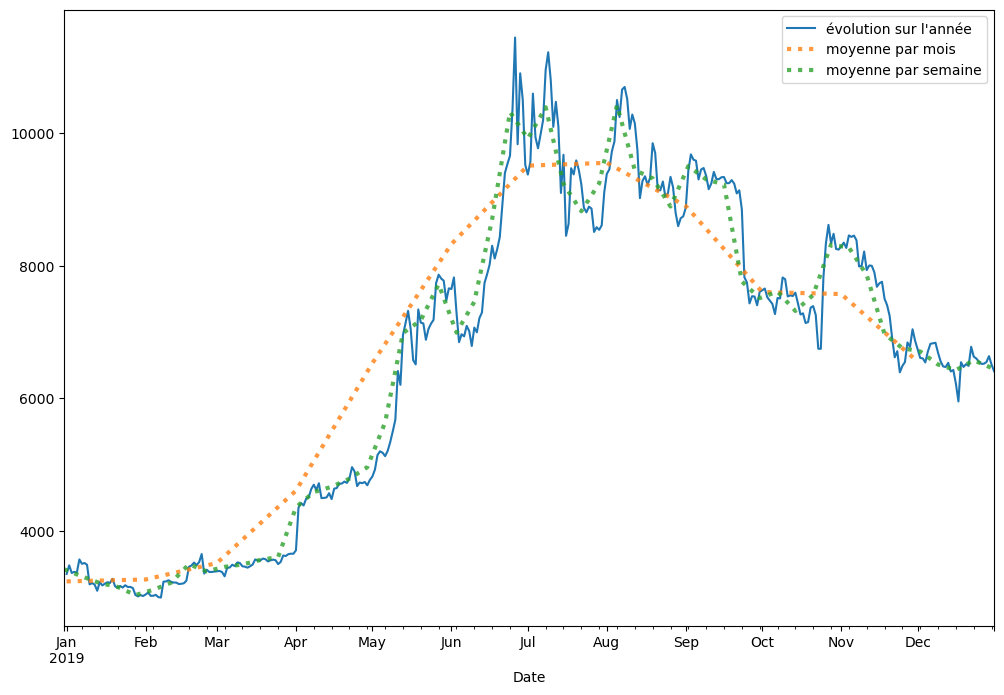

In [15]:
# tout afficher sur la meme figure

plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot(label = "évolution sur l'année")
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label = 'moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label = 'moyenne par semaine', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

# Fonction Aggregate

In [16]:
bitcoin.loc['2019', 'Close'].resample('M').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2019-01-31,3241.492786,154.675614,3015.454102,3572.601807
2019-02-28,3270.404367,183.437120,2998.157227,3653.833008
2019-03-31,3518.958685,84.929107,3317.817383,3659.444824
2019-04-30,4609.844377,222.918594,3710.858154,4964.707031
2019-05-31,6532.714403,1010.175947,4823.619629,7866.871094
2019-06-30,8327.527637,1357.107430,6791.208984,11443.038086
2019-07-31,9511.153604,776.404643,8452.749023,11221.008789
2019-08-31,9552.757151,598.797179,8598.343750,10697.322266
2019-09-30,8902.757308,762.564631,7405.604980,9681.073242


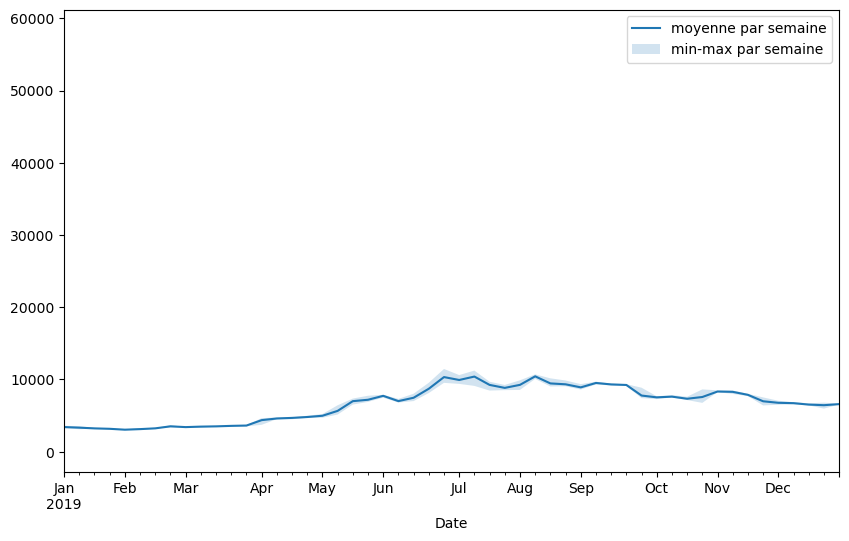

In [17]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(10, 6))
m['mean']['2019'].plot(label = 'moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha = 0.2, label = 'min-max par semaine')

plt.legend()
plt.show()

# Moving Average, Fonction rolling

In [18]:
# Fonction rolling avec une fenetre de 7 jours
bitcoin.loc['2019', 'Close'].rolling(window = 7)

Rolling [window=7,center=False,axis=0,method=single]

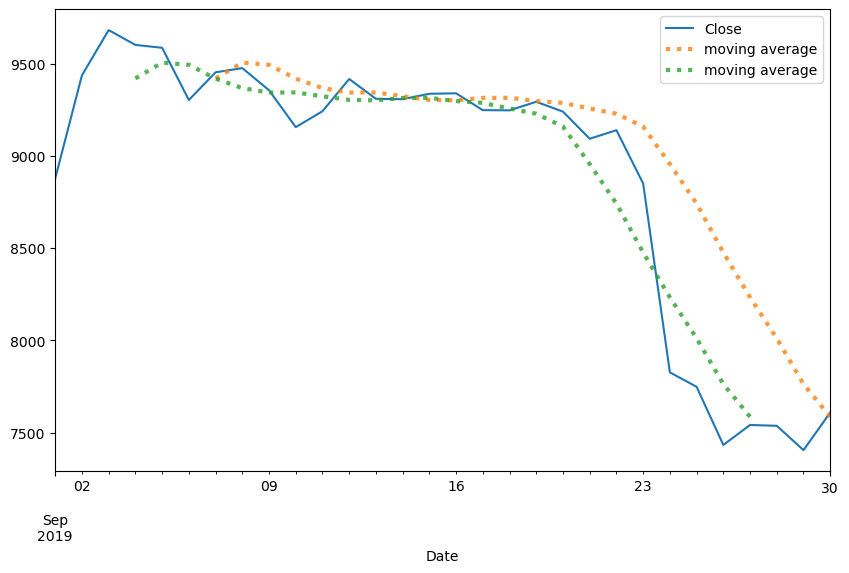

In [19]:
plt.figure(figsize=(10, 6))

bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window = 7).mean().plot(label = 'moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window = 7, center = True).mean().plot(label = 'moving average', lw=3, ls=':', alpha=0.8)
# center = True, pour que la courbe soit décalée
plt.legend()
plt.show()

# Exp Weighted Function ou Moyenne mobile exponentielle


x = alpha($x_{t}$ + (1 - alpha)$x_{t-1}$ + $(1 - alpha)^2$$x_{t-2}$ + $(1 - alpha)^3$$x_{t-3}$ + ...)

Avec $x_{t}$ : la valeur de x à l'instant t
    et alpha : le facteur de lissage (0 < alpha < 1)

Les valeurs perdent peu à peu du poids avec le temps.

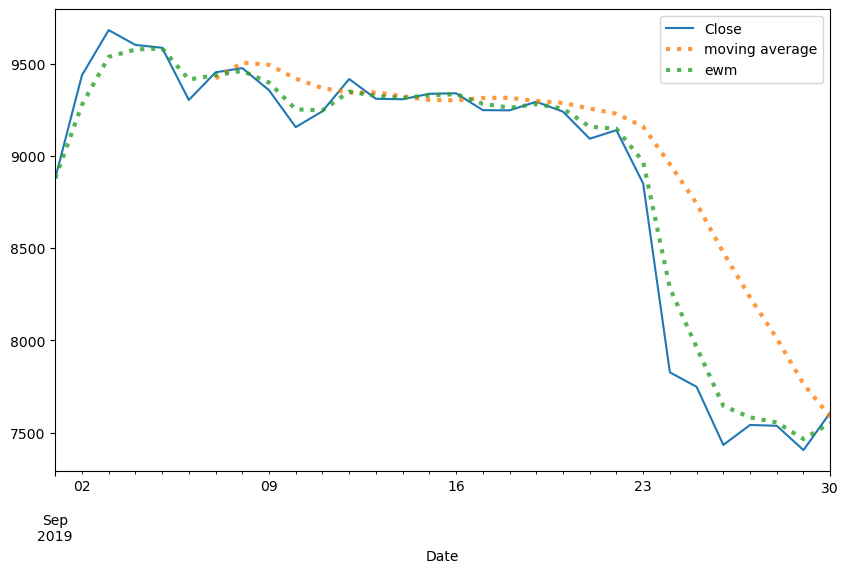

In [20]:
plt.figure(figsize=(10, 6))

bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window = 7).mean().plot(label = 'moving average', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha = 0.6).mean().plot(label = 'ewm', lw=3, ls=':', alpha=0.8)
# center = True, pour que la courbe soit décalée
plt.legend()
plt.show()

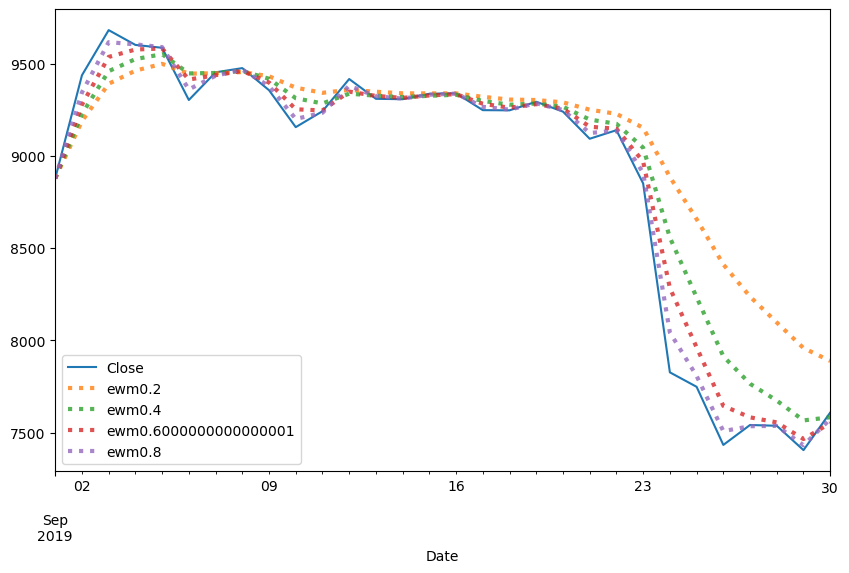

In [21]:
plt.figure(figsize=(10, 6))

bitcoin.loc['2019-09', 'Close'].plot()

for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha = i).mean().plot(label = f'ewm{i}', lw=3, ls=':', alpha=0.8)
# center = True, pour que la courbe soit décalée
plt.legend()
plt.show()

In [22]:
euthereum = pd.read_csv(r"ETH-EUR.csv", index_col='Date', parse_dates = True)
euthereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,7.221993e+08
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1.383774e+09
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,8.933293e+08
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,9.073543e+08
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,6.133644e+08


<Axes: xlabel='Date'>

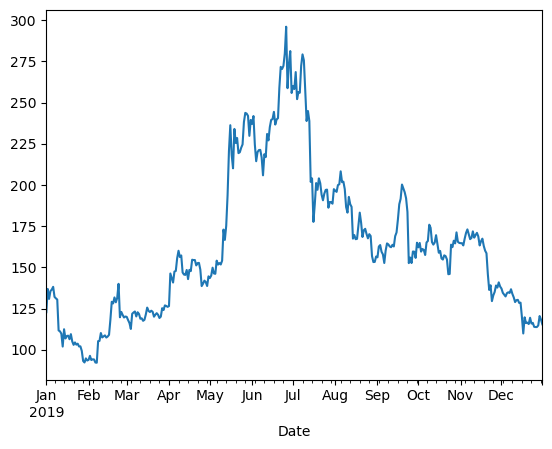

In [23]:
euthereum.loc['2019', 'Close'].plot()

# Merge, Join

In [24]:
btc_eth = pd.merge(bitcoin, euthereum, on = 'Date', how = 'inner', suffixes = ('_btc', '_eth'))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

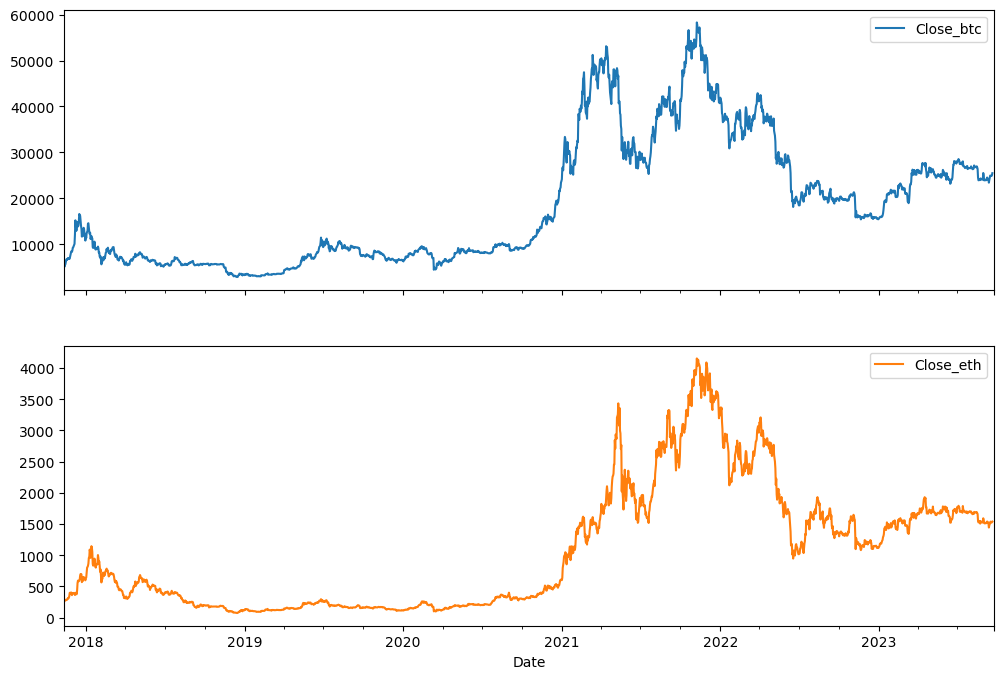

In [25]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots = True, figsize = (12, 8))

In [26]:
correlations = btc_eth[['Close_btc', 'Close_eth']].corr()

<Axes: >

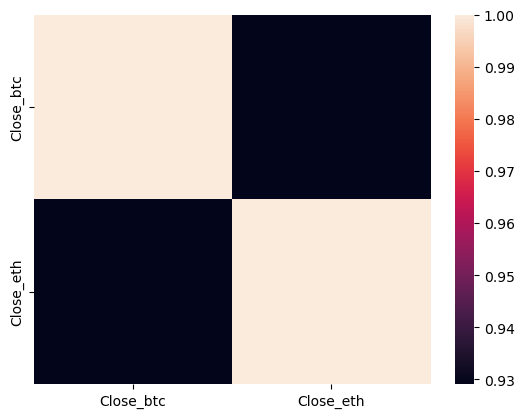

In [27]:
sns.heatmap(correlations)

<Axes: xlabel='Date'>

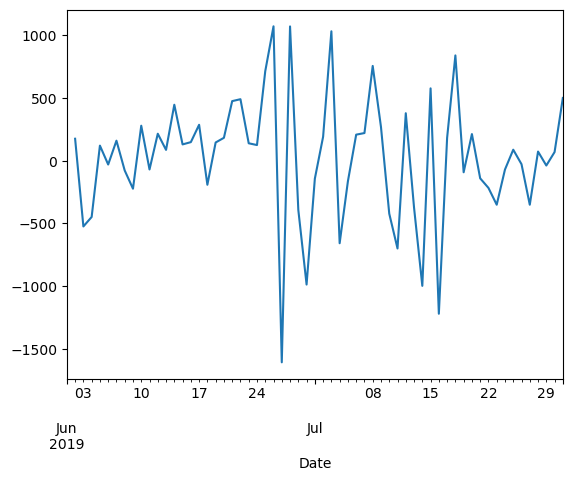

In [28]:
# Pour mesurer la volatilité du bitcoin
bitcoin.loc['2019-06':'2019-07', 'Close'].diff().plot()

# Turtle Strategy

In [29]:
data = bitcoin.copy()
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625.0


In [30]:
# Initialiser les colonnes 'Buy' et 'Sell'
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))
data.head()

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell
Date,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166.0,0.0,0.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0,0.0,0.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103.0,0.0,0.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826.0,0.0,0.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625.0,0.0,0.0


In [31]:
data['roll_max'] = data['Close'].shift(1).rolling(window = 28).max() # shift, afin de décaller d'un jour
data['roll_min'] = data['Close'].shift(1).rolling(window = 28).min()

In [32]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell,roll_max,roll_min
Date,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166.0,0.0,0.0,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0,0.0,0.0,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103.0,0.0,0.0,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826.0,0.0,0.0,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625.0,0.0,0.0,NaN,NaN


In [33]:
data.loc[data['Close'] > data['roll_max'], 'Buy'] = 1
data.loc[data['Close'] < data['roll_min'], 'Sell'] = -1

In [34]:
data[data['Buy'] == 1]

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell,roll_max,roll_min
Date,,,,,,,,,,
2014-11-12,295.025238,345.404694,295.096222,340.784454,340.784454,3.683579e+07,1.0,0.0,307.935272,260.099792
2015-02-27,211.084732,228.929642,211.028214,226.753616,226.753616,3.931919e+07,1.0,0.0,226.057297,189.285950
2015-02-28,226.478470,227.525467,222.868500,227.142212,227.142212,1.246141e+07,1.0,0.0,226.753616,189.285950
2015-03-01,227.160095,234.420364,219.700729,233.155914,233.155914,2.259292e+07,1.0,0.0,227.142212,189.285950
2015-03-02,233.294800,247.182861,231.235336,246.684570,246.684570,3.621092e+07,1.0,0.0,233.155914,189.285950
...,...,...,...,...,...,...,...,...,...,...
2023-04-11,25965.208984,27400.613281,26009.789063,27280.267578,27280.267578,1.773950e+10,1.0,0.0,26251.658203,22565.941406
2023-04-12,27280.910156,27958.433594,27230.933594,27697.037109,27697.037109,1.843222e+10,1.0,0.0,27280.267578,23035.966797
2023-06-22,25926.111328,28035.025391,25896.998047,27317.933594,27317.933594,3.033788e+10,1.0,0.0,26196.158203,23170.253906


In [35]:
data[data['Sell'] == -1]

,Open,High,Low,Close,Adj Close,Volume,Buy,Sell,roll_max,roll_min
Date,,,,,,,,,,
2014-12-10,284.334381,284.570770,277.558289,277.558289,277.558289,1.316428e+07,0.0,-1.0,340.784454,283.216003
2014-12-16,277.894531,277.977020,261.482269,261.482269,261.482269,2.467613e+07,0.0,-1.0,307.834839,277.558289
2014-12-17,261.316772,266.992340,253.950043,259.200775,259.200775,3.045141e+07,0.0,-1.0,307.834839,261.482269
2014-12-18,259.208069,262.176239,247.081940,253.414703,253.414703,3.187907e+07,0.0,-1.0,307.834839,259.200775
2015-01-03,262.393555,262.646881,234.254517,234.254517,234.254517,2.754763e+07,0.0,-1.0,305.128937,253.414703
...,...,...,...,...,...,...,...,...,...,...
2023-08-06,26370.011719,26394.568359,26263.361328,26339.843750,26339.843750,5.984408e+09,0.0,-1.0,28044.089844,26368.833984
2023-08-18,26391.333984,26446.816406,23373.714844,24520.585938,24520.585938,2.861858e+10,0.0,-1.0,27159.880859,26339.843750
2023-08-19,24494.404297,24655.845703,23596.927734,23921.724609,23921.724609,2.206368e+10,0.0,-1.0,27159.880859,24520.585938


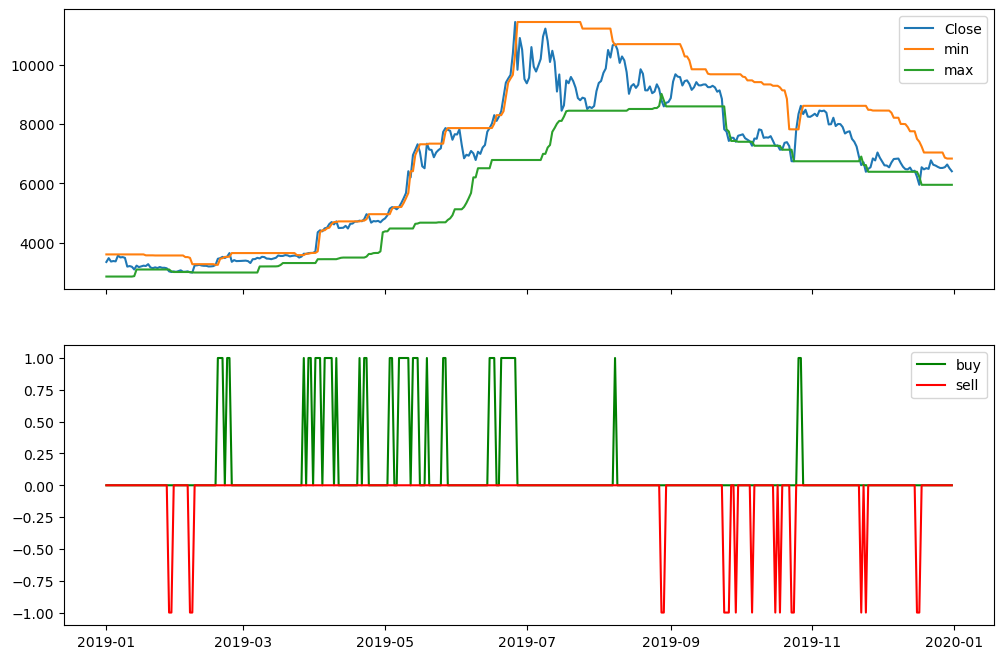

In [36]:
start = '2019'
end = '2019'

fig, ax = plt.subplots(2, figsize = (12, 8), sharex = True)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['roll_max'][start:end])
ax[0].plot(data['roll_min'][start:end])
ax[0].legend(['Close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c = 'g')
ax[1].plot(data['Sell'][start:end], c = 'r')
ax[1].legend(['buy', 'sell'])